# Titanic Survival Prediction

## Introduction
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This project aims to predict whether a passenger on the Titanic would have survived or not based on various features such as age, sex, class, and others.

## Problem Statement
Given a set of features for passengers on the Titanic, our goal is to build a predictive model that can accurately classify whether a passenger survived or not. This is a binary classification problem where the target variable is `Survived`.

## Objectives
- Explore and analyze the Titanic dataset.
- Preprocess the data to handle missing values, encode categorical variables, and scale features.
- Build and evaluate multiple machine learning models.
- Optimize the models to improve performance.

## Dataset
The dataset consists of the following features:

- `PassengerId`: Unique ID for each passenger.
- `Survived`: Survival status (0 = No, 1 = Yes).
- `Pclass`: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).
- `Name`: Name of the passenger.
- `Sex`: Gender of the passenger.
- `Age`: Age of the passenger.
- `SibSp`: Number of siblings/spouses aboard the Titanic.
- `Parch`: Number of parents/children aboard the Titanic.
- `Ticket`: Ticket number.
- `Fare`: Passenger fare.
- `Cabin`: Cabin number (if available).
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

## Notebook Initialization
We will start by importing the necessary libraries and loading the dataset.


In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Train Data:

In [2]:
train_data = pd.read_csv(r'/kaggle/input/titanic/train.csv')

train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Test Data:

In [5]:
test_data = pd.read_csv(r'/kaggle/input/titanic/test.csv')

test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_data.shape

(418, 11)

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Checking for Missing Values

In this section, we will identify any missing values in the dataset. Missing values can affect the performance of machine learning models, so it's important to detect and handle them appropriately.

We will use the `isnull()` function combined with `sum()` to get the count of missing values for each column.


In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Handling Missing Values

### Age
The `Age` column has approximately 20% missing values in both the training and test datasets. We will impute these missing values using the median age of the passengers.

In [10]:
age_imputer = SimpleImputer(strategy='median')
train_data['Age'] = age_imputer.fit_transform(train_data[['Age']])
test_data['Age'] = age_imputer.transform(test_data[['Age']])


### Cabin
The `Cabin` column has a high percentage of missing values (77% in the training set and 78% in the test set). Instead of imputing, we will create a new feature indicating whether the cabin number is known and drop the original `Cabin` column.

In [11]:
train_data['CabinKnown'] = train_data['Cabin'].notnull().astype(int)
test_data['CabinKnown'] = test_data['Cabin'].notnull().astype(int)

train_data = train_data.drop(columns=['Cabin'])
test_data = test_data.drop(columns=['Cabin'])

### Embarked
The `Embarked` column has only 2 missing values in the training set. We will impute these missing values with the most frequent port of embarkation.


In [12]:
#Impute missing 'Embarked' values with the mode
embarked_imputer = SimpleImputer(strategy='most_frequent')
train_data['Embarked'] = embarked_imputer.fit_transform(train_data[['Embarked']]).ravel()

### Fare
The `Fare` column has 1 missing value in the test set. We will impute this missing value with the median fare.

In [13]:
fare_imputer = SimpleImputer(strategy='median')
test_data['Fare'] = fare_imputer.fit_transform(test_data[['Fare']])

## Checking for Missing Values

Before proceeding with data preprocessing and feature engineering, it is essential to understand the extent of missing data in the dataset.

In [14]:
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
CabinKnown     0
dtype: int64


In [15]:
print(test_data.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
CabinKnown     0
dtype: int64


## Feature Engineering

Feature engineering involves transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model performance.


### Extracting Titles from Names

In [16]:
train_test_dataset=[train_data,test_data]
for dataset in train_test_dataset:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [17]:
train_data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [18]:
test_data['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

### Mapping Titles to Numerical Values

In [19]:
title_mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for data in train_test_dataset:
    data['Title']=data['Title'].map(title_mapping)

In [20]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinKnown,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0


In [21]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinKnown,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,2


### Dropping the Original Name Column

In [22]:
train_data.drop('Name',axis=1,inplace=True)
test_data.drop('Name',axis=1,inplace=True)

In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinKnown,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1,2
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0,0


### Mapping Sex to Numerical Values

In [24]:
Sexe_mapping={"male":0,"female":1}
for data in train_test_dataset:
    data['Sex']=data['Sex'].map(Sexe_mapping)

In [25]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinKnown,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,S,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C,1,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,S,1,2
4,5,0,3,0,35.0,0,0,373450,8.0500,S,0,0


### Mapping Age to Numerical Values

In [26]:
for dataset in train_test_dataset:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinKnown,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,S,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,S,1,2
4,5,0,3,0,2.0,0,0,373450,8.0500,S,0,0


### Mapping Embarked to Numerical Values

In [28]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_dataset:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [29]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinKnown,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,1,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,0,1,2
4,5,0,3,0,2.0,0,0,373450,8.0500,0,0,0


### Mapping Fare to Numerical Values

In [30]:
for dataset in train_test_dataset:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [31]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinKnown,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,1,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0,1,2
4,5,0,3,0,2.0,0,0,373450,0.0,0,0,0


### Mapping FamilySize to Numerical Values

In [32]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1

In [33]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_dataset:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [34]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinKnown,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,1,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0,1,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,0,0,0,0.0


### Dropping Unnecessary Columns

In [35]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train_data.drop(features_drop, axis=1)
test = test_data.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

### Separating Features and Target Variable

In [36]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [37]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Embarked,CabinKnown,Title,FamilySize
0,3,0,1.0,0.0,0,0,0,0.4
1,1,1,3.0,2.0,1,1,2,0.4
2,3,1,1.0,0.0,0,0,1,0.0
3,1,1,2.0,2.0,0,1,2,0.4
4,3,0,2.0,0.0,0,0,0,0.0
5,3,0,2.0,0.0,2,0,0,0.0
6,1,0,3.0,2.0,0,1,0,0.0
7,3,0,0.0,1.0,0,0,3,1.6
8,3,1,2.0,0.0,0,0,2,0.8
9,2,1,0.0,2.0,1,0,2,0.4


In [38]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,CabinKnown,Title,FamilySize
0,0,3,0,1.0,0.0,0,0,0,0.4
1,1,1,1,3.0,2.0,1,1,2,0.4
2,1,3,1,1.0,0.0,0,0,1,0.0
3,1,1,1,2.0,2.0,0,1,2,0.4
4,0,3,0,2.0,0.0,0,0,0,0.0


In [39]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,CabinKnown,Title,FamilySize
0,892,3,0,2.0,0.0,2,0,0,0.0
1,893,3,1,3.0,0.0,0,0,2,0.4
2,894,2,0,3.0,0.0,2,0,0,0.0
3,895,3,0,2.0,0.0,0,0,0,0.0
4,896,3,1,1.0,0.0,0,0,2,0.8


In [40]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinKnown,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2,0,0,0.0
1,893,3,1,3.0,1,0,363272,0.0,0,0,2,0.4
2,894,2,0,3.0,0,0,240276,0.0,2,0,0,0.0
3,895,3,0,2.0,0,0,315154,0.0,0,0,0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,0,0,2,0.8


## Modeling

In this section, we will train a machine learning model to predict survival on the Titanic.

### K-Fold Cross-Validation Setup

To evaluate the performance of our model more robustly, we will use k-fold cross-validation.

In [41]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### Training and Evaluating a K-Nearest Neighbors (KNN) Classifier

In this section, we will train a K-Nearest Neighbors (KNN) classifier

In [42]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.78651685 0.80898876 0.83146067 0.84269663 0.80898876
 0.84269663 0.78651685 0.82022472 0.82022472]


In [43]:
round(np.mean(score)*100, 2)

81.71

### Training and Evaluating a Decision Tree Classifier

In this section, we will train a Decision Tree Classifier

In [44]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.80898876 0.78651685 0.73033708 0.86516854 0.7752809
 0.85393258 0.80898876 0.76404494 0.79775281]


In [45]:
round(np.mean(score)*100, 2)

79.8

### Training and Evaluating a Random Forest Classifier

In this section, we will train a Random Forest Classifier

In [46]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.83146067 0.80898876 0.78651685 0.84269663 0.79775281
 0.78651685 0.79775281 0.73033708 0.80898876]


In [47]:
round(np.mean(score)*100, 2)

80.24

## Training and Evaluating a Support Vector Classifier (SVC)

In this section, we will train a Support Vector Classifier (SVC)

In [48]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.80898876 0.80898876 0.82022472 0.84269663 0.80898876
 0.84269663 0.85393258 0.83146067 0.84269663]


In [49]:
round(np.mean(score)*100,2)

82.94

After training and evaluating several machine learning models, the Support Vector Classifier **(SVC)** has demonstrated superior performance based on accuracy scores from k-fold cross-validation.

### Making Predictions

In [50]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [51]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [52]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


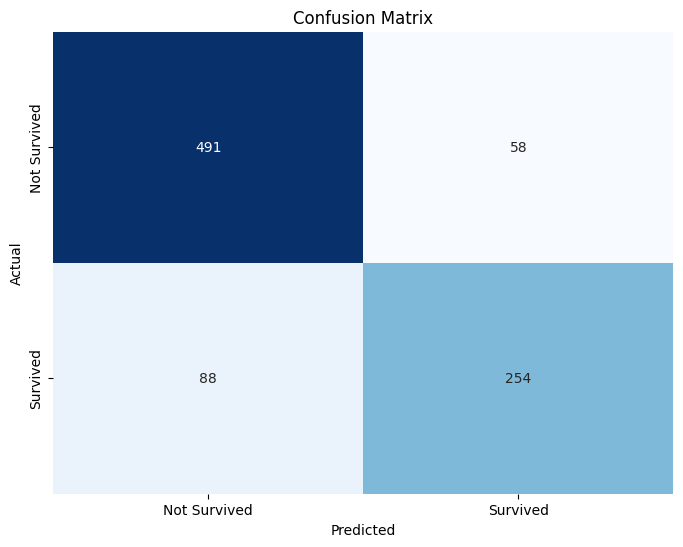

In [53]:
cm = confusion_matrix(target, clf.predict(train_data))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()